In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import math
import seaborn as sns

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = df.drop('customerID', axis = 1)

In [3]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna() == False]

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

/tmp/ipython-input-5-964642758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


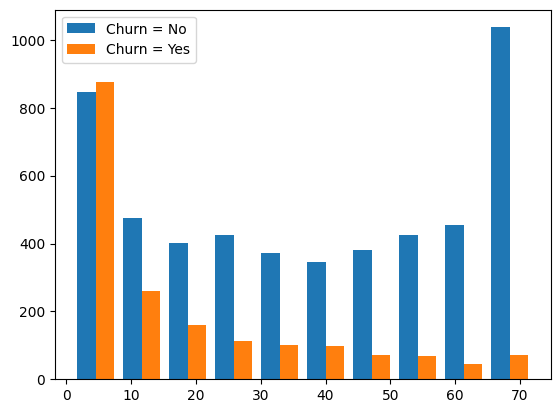

In [6]:
churn_tenure = df[df['Churn'] == 'Yes']['tenure']
not_churn_tenure = df[df['Churn'] == 'No']['tenure']
plt.hist([not_churn_tenure, churn_tenure], bins=10, label=['Churn = No', 'Churn = Yes'])
plt.legend()

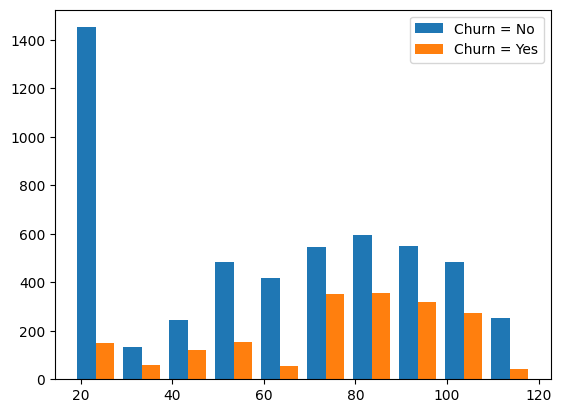

In [7]:
churn_monthly_charge = df[df['Churn'] == 'Yes']['MonthlyCharges']
not_churn_monthy_charge = df[df['Churn'] == 'No']['MonthlyCharges']
plt.hist([not_churn_monthy_charge, churn_monthly_charge], label=['Churn = No', 'Churn = Yes'])
plt.legend()

In [8]:
def print_unique_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(column, " : ", df[column].unique())

In [9]:
print_unique_values(df)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [10]:
df = df.replace('No internet service', 'No')

In [11]:
print_unique_values(df)

gender  :  ['Female' 'Male']
Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes']
OnlineBackup  :  ['Yes' 'No']
DeviceProtection  :  ['No' 'Yes']
TechSupport  :  ['No' 'Yes']
StreamingTV  :  ['No' 'Yes']
StreamingMovies  :  ['No' 'Yes']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [12]:
df = df.replace('No phone service', 'No')

In [13]:
yes_no_cols = []
for columns in df:
  if (len(df[columns].unique()) == 2):
    unique_vals = df[columns].unique()
    if (set(unique_vals) == {'Yes', 'No'} or set(unique_vals) == {'No', 'Yes'}):
      yes_no_cols.append(columns)

In [14]:
for cols in yes_no_cols:
  df[cols].replace({'Yes': 1, 'No': 0}, inplace = True)

/tmp/ipython-input-14-1708996294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cols].replace({'Yes': 1, 'No': 0}, inplace = True)
/tmp/ipython-input-14-1708996294.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols].replace({'Yes': 1, 'No': 0}, inplace = True)


In [15]:
df['gender'].replace({'Male': 1, 'Female': 0}, inplace = True)

/tmp/ipython-input-15-1455926032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Male': 1, 'Female': 0}, inplace = True)
/tmp/ipython-input-15-1455926032.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Male': 1, 'Female': 0}, inplace = True)


In [16]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype=int)

In [17]:
scaler = MinMaxScaler()
scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [18]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
df.shape

(7032, 27)

In [78]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26, ), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7306 - loss: 0.5534
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7824 - loss: 0.4474
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8011 - loss: 0.4271
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4190
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8055 - loss: 0.4203
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8091 - loss: 0.4053
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8057 - loss: 0.4096
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8107 - loss: 0.4108
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8001 - loss: 0.4235
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8041 - loss: 0.4174
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4098
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

In [21]:
ypred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [22]:
y_pred = (ypred >= 0.5).astype(int).reshape(ypred.shape[0])
np.mean(y_pred == y_test)

np.float64(0.7853589196872779)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1042
           1       0.59      0.54      0.57       365

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<Axes: >

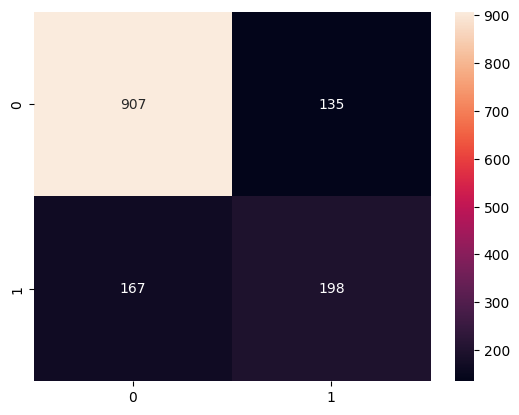

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')

The data needs to be balanced

In [19]:
def ANN(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
  model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26, ), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
  ])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.fit(X_train, y_train, epochs = 100)
  ypred = model.predict(X_test)
  y_pred = (ypred >= 0.5).astype(int).reshape(ypred.shape[0])
  np.mean(y_pred == y_test)
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd')

1. Undersampling

In [52]:
count_class_1 = df[df['Churn'] == 1].shape[0]
count_class_0 = df[df['Churn'] == 0].shape[0]
print(count_class_1, count_class_0)

1869 5163


In [44]:
class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]
balanced_class_0 = class_0.sample(count_class_1)

In [45]:
print(balanced_class_0.shape, class_1.shape)

(1869, 27) (1869, 27)


In [48]:
new_dataframe = pd.concat([balanced_class_0, class_1], axis = 0)

In [50]:
X = new_dataframe.drop('Churn', axis = 1)
y = new_dataframe['Churn']

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6217 - loss: 0.6483
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.5438
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7441 - loss: 0.5256
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.5031
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.5054
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.4972
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.4977
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.4907
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7714 - loss: 0.4811
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7756 - loss: 0.4729
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7659 - loss: 0.4830
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - l

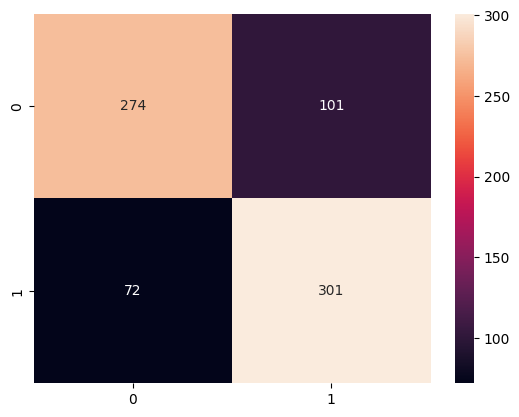

In [51]:
ANN(X, y)

2. Oversampling

In [53]:
count_class_1 = df[df['Churn'] == 1].shape[0]
count_class_0 = df[df['Churn'] == 0].shape[0]
print(count_class_1, count_class_0)

1869 5163


In [56]:
class_1_df = df[df['Churn'] == 1].sample(5163, replace = True)
class_2_df = df[df['Churn'] == 0]

In [61]:
new_df = pd.concat([class_1_df, class_2_df], axis = 0)
X_new = new_df.drop('Churn', axis = 1)
y_new = new_df['Churn']

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6234 - loss: 0.6330
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7528 - loss: 0.5010
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7525 - loss: 0.4906
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7601 - loss: 0.4906
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7580 - loss: 0.4915
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7642 - loss: 0.4863
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7636 - loss: 0.4783
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7651 - loss: 0.4757
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7727 - loss: 0.4700
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7764 - loss: 0.4682
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7684 - loss: 0.4810
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

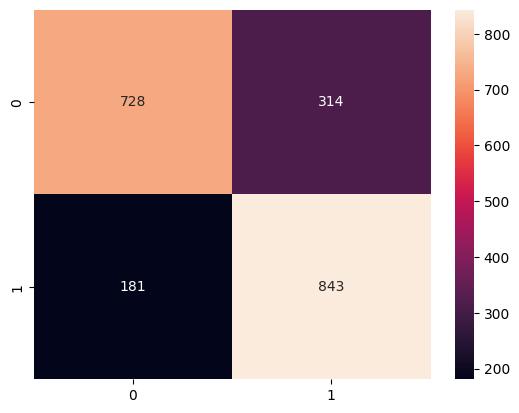

In [62]:
ANN(X_new, y_new)

3. SMOTE

In [24]:
smote = SMOTE(sampling_strategy='minority')
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_sm, y_sm = smote.fit_resample(X, y)

In [25]:
y_sm.value_counts()

,count
Churn,
0,5163
1,5163


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7202 - loss: 0.5747
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7666 - loss: 0.4923
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7756 - loss: 0.4729
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7770 - loss: 0.4623
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7772 - loss: 0.4662
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7767 - loss: 0.4604
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.4454
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7769 - loss: 0.4546
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7798 - loss: 0.4599
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7887 - loss: 0.4470
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7843 - loss: 0.4448
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

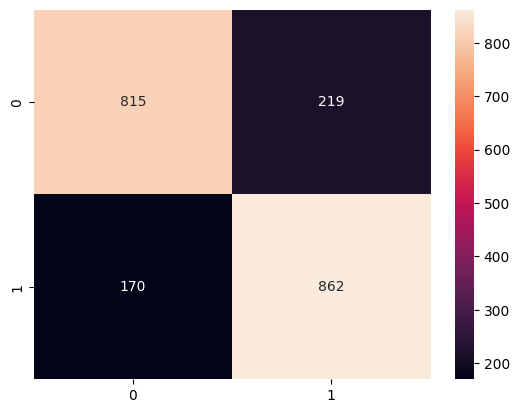

In [26]:
ANN(X_sm, y_sm)

4. Ensemble with undersampling

In [20]:
print(df[df['Churn'] == 1].shape[0], df[df['Churn'] == 0].shape[0])

1869 5163


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis = 1), df['Churn'], train_size = 0.8)

In [31]:
y_train.value_counts()

,count
Churn,
0,4146
1,1479


In [32]:
4146 / 1479

2.8032454361054766

In [52]:
df_train = X_train.copy()
df_train['Churn'] = y_train
y_train.value_counts()

,count
Churn,
0,4146
1,1479


In [62]:
def get_training_samples(df_train):
  training_samples = []
  df_train_1 = df_train[df_train['Churn'] == 1]
  df_train_0 = df_train[df_train['Churn'] == 0]
  size_1 = df_train_1.shape[0]
  size_0 = df_train_0.shape[0]
  if (size_1 > size_0):
    for i in range(0, math.ceil(size_1 / size_0)):
      new_df_train_1 = df_train_1.iloc[i * size_0 : min((i + 1) * size_0, size_1)]
      new_df_train = pd.concat([new_df_train_1, df_train_0], axis = 0)
      training_samples.append(new_df_train)
  else:
    for i in range(0, math.ceil(size_0 / size_1)):
      new_df_train_0 = df_train_0.iloc[i * size_1 : min((i + 1) * size_1, size_0)]
      new_df_train = pd.concat([new_df_train_0, df_train_1], axis = 0)
      training_samples.append(new_df_train)
  return training_samples

In [80]:
training_samples = get_training_samples(df_train)

In [95]:
def ANN_2(X_train, y_train, X_test):
  model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26, ), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
  ])
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.fit(X_train, y_train, epochs = 100)
  ypred = model.predict(X_test)
  y_pred = (ypred >= 0.5).astype(int)
  return y_pred

In [96]:
y_pred = ANN_2(training_samples[0].drop('Churn', axis = 1), training_samples[0]['Churn'], X_test)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6135 - loss: 0.6780
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7406 - loss: 0.5400
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - loss: 0.5054
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7530 - loss: 0.5113
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 0.5095
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.4857
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7562 - loss: 0.4941
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7714 - loss: 0.4832
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7587 - loss: 0.4934
Epoch 10/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7482 - loss: 0.4906
Epoch 11/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.4770
Epoch 12/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7630 - lo

<Axes: >

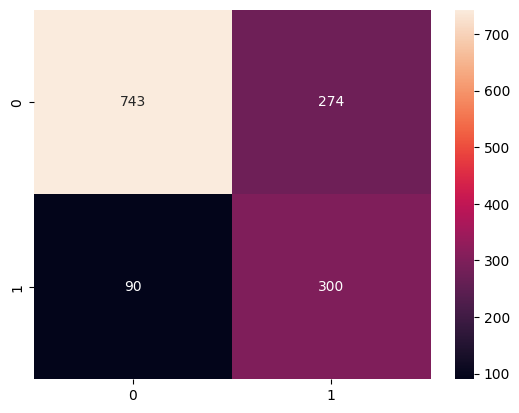

In [102]:
cm_new = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_new, annot = True, fmt = 'g')

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1017
           1       0.52      0.77      0.62       390

    accuracy                           0.74      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



In [100]:
y_pred_1 = ANN_2(training_samples[1].drop('Churn', axis = 1), training_samples[1]['Churn'], X_test)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5791 - loss: 0.6914
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.5543
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7713 - loss: 0.4953
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7684 - loss: 0.4936
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4833
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.4849
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7694 - loss: 0.4835
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7709 - loss: 0.4787
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7722 - loss: 0.4744
Epoch 10/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.4812
Epoch 11/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7693 - loss: 0.4755
Epoch 12/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - lo

<Axes: >

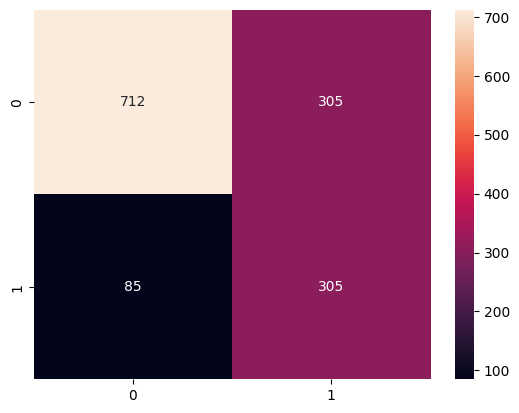

In [107]:
cm_new = confusion_matrix(y_test, y_pred_1)
sns.heatmap(cm_new, annot = True, fmt = 'g')

In [105]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.89      0.70      0.79      1017
           1       0.50      0.78      0.61       390

    accuracy                           0.72      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.72      0.74      1407



In [106]:
y_pred_2 = ANN_2(training_samples[2].drop('Churn', axis = 1), training_samples[2]['Churn'], X_test)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6057 - loss: 0.6735
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7363 - loss: 0.5593
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7581 - loss: 0.5142
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7566 - loss: 0.4997
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7564 - loss: 0.4868
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7560 - loss: 0.4806
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7644 - loss: 0.4780
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.4680
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7631 - loss: 0.4746
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7680 - loss: 0.4682
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7651 - loss: 0.4619
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7712 - l

<Axes: >

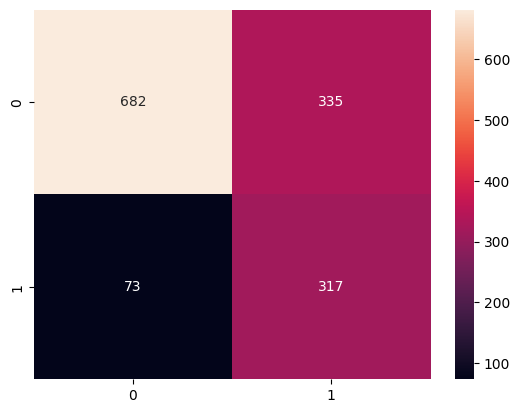

In [111]:
cm_new = confusion_matrix(y_test, y_pred_2)
sns.heatmap(cm_new, annot = True, fmt = 'g')

In [112]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1017
           1       0.49      0.81      0.61       390

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407



In [117]:
y_pred_voted = []
for i in range(0, y_pred_1.shape[0]):
  sum = y_pred[i] + y_pred_1[i] + y_pred_2[i]
  if (sum > 1):
    y_pred_voted.append(1)
  else:
    y_pred_voted.append(0)

<Axes: >

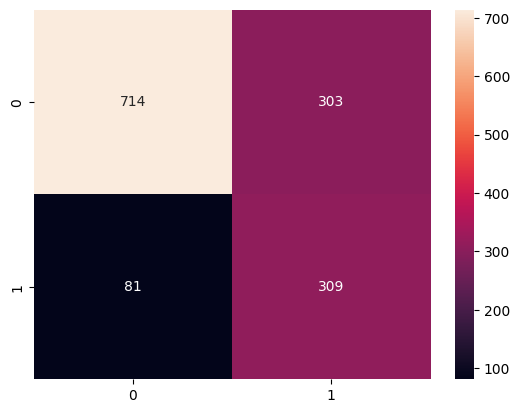

In [119]:
cm_voted = confusion_matrix(y_test, y_pred_voted)
sns.heatmap(cm_voted, annot = True, fmt = 'g')

In [121]:
print(classification_report(y_test, y_pred_voted))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1017
           1       0.50      0.79      0.62       390

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

